<a href="https://colab.research.google.com/github/sheikmohdimran/Experiments_2021/blob/main/01_Intro_to_NN_Pytorch/Week3_Intro_to_NN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.buymeacoffee.com/sheikmohdimran" target="_blank"><img src="https://cdn.buymeacoffee.com/buttons/default-orange.png" alt="Buy Me A Coffee" height="30" width="120"></a>

You can support my work by buying me a coffee [here](https://www.buymeacoffee.com/sheikmohdimran).

## Image Classification


Image classification is one of the important use cases in our daily life. Automotive, e-commerce, retail, manufacturing industries, security, surveillance, healthcare, farming etc., can have a wide application of image classification.

**Objective:** In this notebook, we will build a neural network to classifiy the image based on the object present in the image.



## Advanced techniques for training neural networks

Weight Initialization

Nonlinearity (different Activation functions)

Optimizers(different optimizers)

Batch Normalization

Dropout

### About Dataset


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

#### Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot 

### Load dataset

Fashion-MNIST dataset


In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


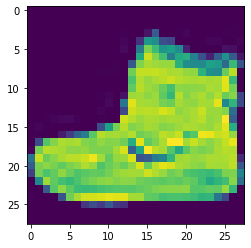

Label:  9


In [ ]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])


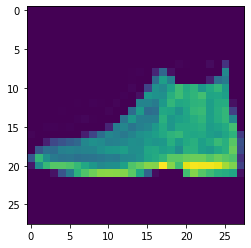

Label:  9


In [ ]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train[0]

9

### Basic NN model

Naive MLP model without any alterations

In [6]:
!pip install fastai==2.4.1 -qqq
!pip install wandb -qqq

     |████████████████████████████████| 188 kB 4.1 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 1.7 MB 4.0 MB/s 
     |████████████████████████████████| 133 kB 56.9 MB/s 
     |████████████████████████████████| 170 kB 65.8 MB/s 
     |████████████████████████████████| 97 kB 8.3 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 


In [7]:
import wandb
import torch
from torch import nn
from torch import sigmoid
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch import optim

import sklearn.metrics as skm
from fastai.tabular.all import *
from fastai.callback.wandb import *

In [114]:
!wandb login f0ec70da847783160066976cd7aa3b6c64cb1007

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
wandb.init(name='Intro-to-NN-3', project='pytorch-basics',entity='sheikmohdimran')

In [151]:
def create_loaders(batch_size=32):
  train_loader = DataLoader(TensorDataset(torch.from_numpy(X_train.astype(np.float32)), torch.from_numpy(y_train.astype(np.long))), batch_size=32)
  test_loader  = DataLoader(TensorDataset(torch.from_numpy(X_test.astype(np.float32)), torch.from_numpy(y_test.astype(np.long))), batch_size=batch_size*2)
  return  train_loader, test_loader

#https://stackoverflow.com/questions/60440292/runtimeerror-expected-scalar-type-long-but-found-float  

In [ ]:
# https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/linear.py#L96

In [152]:
def create_model(input_dim = 784, hidden = 50, out_dim = 10):
 return nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_dim, out_features=hidden),
        nn.Sigmoid(),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.Sigmoid(),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.Sigmoid(),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.Sigmoid(),
        nn.Linear(in_features=hidden, out_features=out_dim),
    )

In [153]:
train_loader, test_loader = create_loaders(200)
data = DataLoaders(train_loader, test_loader)
model = create_model()
learn = Learner(data, 
                model, 
                loss_func=CrossEntropyLossFlat(),                                                    # This criterion combines LogSoftmax and NLLLoss in one single class,
                                                                                                     # The input is expected to contain raw, unnormalized scores for each class.
                opt_func=partial(OptimWrapper, opt=optim.RMSprop),                                   # https://docs.fast.ai/migrating_pytorch_verbose.html#Optimizer
                metrics=accuracy,                                                           
                cbs=[WandbCallback(log_preds=False)],                                                # https://docs.fast.ai/callback.wandb.html
                lr=1e-3
                )

In [154]:
learn.fit(10)  

Could not gather input dimensions
WandbCallback requires use of "SaveModelCallback" to log best model


epoch,train_loss,valid_loss,accuracy,time
0,1.063850,1.071398,0.560300,00:14
1,0.982856,0.986676,0.604100,00:14
2,0.958947,1.004603,0.618800,00:14
3,0.864257,0.902176,0.665200,00:15
4,0.870741,0.887975,0.668400,00:15
5,0.871306,0.905056,0.657400,00:16
6,0.839938,0.959036,0.613800,00:16
7,0.813662,0.863187,0.672600,00:16
8,0.799971,0.823704,0.680900,00:16
9,0.804811,0.804825,0.685800,00:16


### 1. Weight Initialization

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree

Ref: https://pytorch.org/docs/stable/nn.init.html

In [ ]:
wandb.init(name='Intro-to-NN-3-kaimig-normal', project='pytorch-basics',entity='sheikmohdimran',reinit=True)

In [156]:
model = create_model()
learn = Learner(data, 
                model, 
                loss_func=CrossEntropyLossFlat(),                                                    # This criterion combines LogSoftmax and NLLLoss in one single class,
                                                                                                     # The input is expected to contain raw, unnormalized scores for each class.
                opt_func=partial(OptimWrapper, opt=optim.RMSprop),                                   # https://docs.fast.ai/migrating_pytorch_verbose.html#Optimizer
                metrics=accuracy,                                                           
                cbs=[WandbCallback(log_preds=False)],                                                # https://docs.fast.ai/callback.wandb.html
                lr=1e-3
                )

In [157]:
# https://discuss.pytorch.org/t/how-are-layer-weights-and-biases-initialized-by-default/13073/44

def weights_init(m):
  if isinstance(m, nn.Linear):
    torch.nn.init.kaiming_normal_(m.weight)
    if m.bias is not None:
      torch.nn.init.zeros_(m.bias)

model.apply(weights_init);

In [158]:
learn.fit(10)  

Could not gather input dimensions
WandbCallback requires use of "SaveModelCallback" to log best model


epoch,train_loss,valid_loss,accuracy,time
0,1.021339,1.015061,0.601700,00:13
1,0.798684,0.819884,0.680800,00:13
2,0.736964,0.761119,0.714400,00:13
3,0.720389,0.745367,0.718600,00:14
4,0.689112,0.721195,0.730000,00:14
5,0.688691,0.729623,0.718300,00:14
6,0.683347,0.676857,0.740700,00:15
7,0.641122,0.671054,0.747300,00:15
8,0.650172,0.668922,0.750200,00:14
9,0.627765,0.659542,0.753300,00:14


### 2. Nonlinearity (Activation function)

Sigmoid functions suffer from gradient vanishing problem, making training slower

There are many choices apart from sigmoid and tanh; try many of them!

'relu' (rectified linear unit) is one of the most popular ones

Ref: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html

In [ ]:
wandb.init(name='Intro-to-NN-3-ReLU', project='pytorch-basics',entity='sheikmohdimran',reinit=True)

In [161]:
def create_model(input_dim = 784, hidden = 50, out_dim = 10):
 return nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_dim, out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden, out_features=out_dim),
    )

In [162]:
model = create_model()
learn = Learner(data, 
                model, 
                loss_func=CrossEntropyLossFlat(),                                                    # This criterion combines LogSoftmax and NLLLoss in one single class,
                                                                                                     # The input is expected to contain raw, unnormalized scores for each class.
                opt_func=partial(OptimWrapper, opt=optim.RMSprop),                                   # https://docs.fast.ai/migrating_pytorch_verbose.html#Optimizer
                metrics=accuracy,                                                           
                cbs=[WandbCallback(log_preds=False)],                                                # https://docs.fast.ai/callback.wandb.html
                lr=1e-3
                )

In [163]:
learn.fit(10)

Could not gather input dimensions
WandbCallback requires use of "SaveModelCallback" to log best model


epoch,train_loss,valid_loss,accuracy,time
0,0.475683,0.467805,0.828100,00:13
1,0.423905,0.457945,0.836100,00:13
2,0.395490,0.442619,0.838200,00:13
3,0.389583,0.411686,0.852000,00:14
4,0.356687,0.415896,0.854500,00:15
5,0.359042,0.409263,0.855100,00:15
6,0.349911,0.414477,0.859300,00:15
7,0.351839,0.406180,0.855600,00:16
8,0.355344,0.427623,0.849700,00:16
9,0.353890,0.424352,0.860100,00:16


### 3. Batch Normalization

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity

Ref: https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html?highlight=batchnormalization

Batch normalization layer is usually inserted after dense/convolution and before nonlinearity



In [ ]:
wandb.init(name='Intro-to-NN-3-BatchNorm', project='pytorch-basics',entity='sheikmohdimran',reinit=True)

In [166]:
def create_model(input_dim = 784, hidden = 50, out_dim = 10):
 return nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_dim, out_features=hidden),
        nn.BatchNorm1d(num_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.BatchNorm1d(num_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.BatchNorm1d(num_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.BatchNorm1d(num_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden, out_features=out_dim),
    )

In [167]:
model = create_model()
learn = Learner(data, 
                model, 
                loss_func=CrossEntropyLossFlat(),                                                    # This criterion combines LogSoftmax and NLLLoss in one single class,
                                                                                                     # The input is expected to contain raw, unnormalized scores for each class.
                opt_func=partial(OptimWrapper, opt=optim.RMSprop),                                   # https://docs.fast.ai/migrating_pytorch_verbose.html#Optimizer
                metrics=accuracy,                                                           
                cbs=[WandbCallback(log_preds=False)],                                                # https://docs.fast.ai/callback.wandb.html
                lr=1e-3
                )

In [168]:
learn.fit(10)

Could not gather input dimensions
WandbCallback requires use of "SaveModelCallback" to log best model


epoch,train_loss,valid_loss,accuracy,time
0,0.442366,0.438341,0.843700,00:19
1,0.383040,0.410727,0.849000,00:19
2,0.343601,0.377861,0.863700,00:19
3,0.322380,0.368824,0.864600,00:20
4,0.302762,0.367403,0.866900,00:20
5,0.287062,0.367931,0.870600,00:21
6,0.271090,0.368958,0.871700,00:19
7,0.259333,0.378670,0.866800,00:19
8,0.242114,0.399310,0.867400,00:19
9,0.232794,0.397509,0.868500,00:21


### Dropout

Reference: https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html?highlight=dropout#torch.nn.Dropout

In [ ]:
wandb.init(name='Intro-to-NN-3-BatchNorm+DropOut+KaimingNormal', project='pytorch-basics',entity='sheikmohdimran',reinit=True)

In [170]:
def create_model(input_dim = 784, hidden = 50, out_dim = 10):
 return nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_dim, out_features=hidden),
        nn.BatchNorm1d(num_features=hidden),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.BatchNorm1d(num_features=hidden),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.BatchNorm1d(num_features=hidden),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.BatchNorm1d(num_features=hidden),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(in_features=hidden, out_features=out_dim),
    )

In [171]:
def weights_init(m):
  if isinstance(m, nn.Linear):
    torch.nn.init.kaiming_normal_(m.weight)
    if m.bias is not None:
      torch.nn.init.zeros_(m.bias)

model.apply(weights_init);

In [172]:
model = create_model()
learn = Learner(data, 
                model, 
                loss_func=CrossEntropyLossFlat(),                                                    # This criterion combines LogSoftmax and NLLLoss in one single class,
                                                                                                     # The input is expected to contain raw, unnormalized scores for each class.
                opt_func=partial(OptimWrapper, opt=optim.RMSprop),                                   # https://docs.fast.ai/migrating_pytorch_verbose.html#Optimizer
                metrics=accuracy,                                                           
                cbs=[WandbCallback()],                                                               # https://docs.fast.ai/callback.wandb.html
                lr=1e-3
                )

In [173]:
learn.fit(10)

Could not gather input dimensions
WandbCallback requires use of "SaveModelCallback" to log best model
WandbCallback was not able to prepare a DataLoader for logging prediction samples -> 'TensorDataset' object has no attribute 'items'


epoch,train_loss,valid_loss,accuracy,time
0,0.581526,0.499117,0.825400,00:19
1,0.536405,0.437500,0.844500,00:20
2,0.524953,0.429492,0.842500,00:20
3,0.492622,0.414725,0.850600,00:20
4,0.473888,0.393176,0.856000,00:20
5,0.465750,0.398282,0.859300,00:20
6,0.450849,0.378842,0.864200,00:19
7,0.435129,0.375380,0.863000,00:20
8,0.423164,0.377438,0.862600,00:21
9,0.442778,0.378457,0.867200,00:20


In [ ]:
wandb.finish()

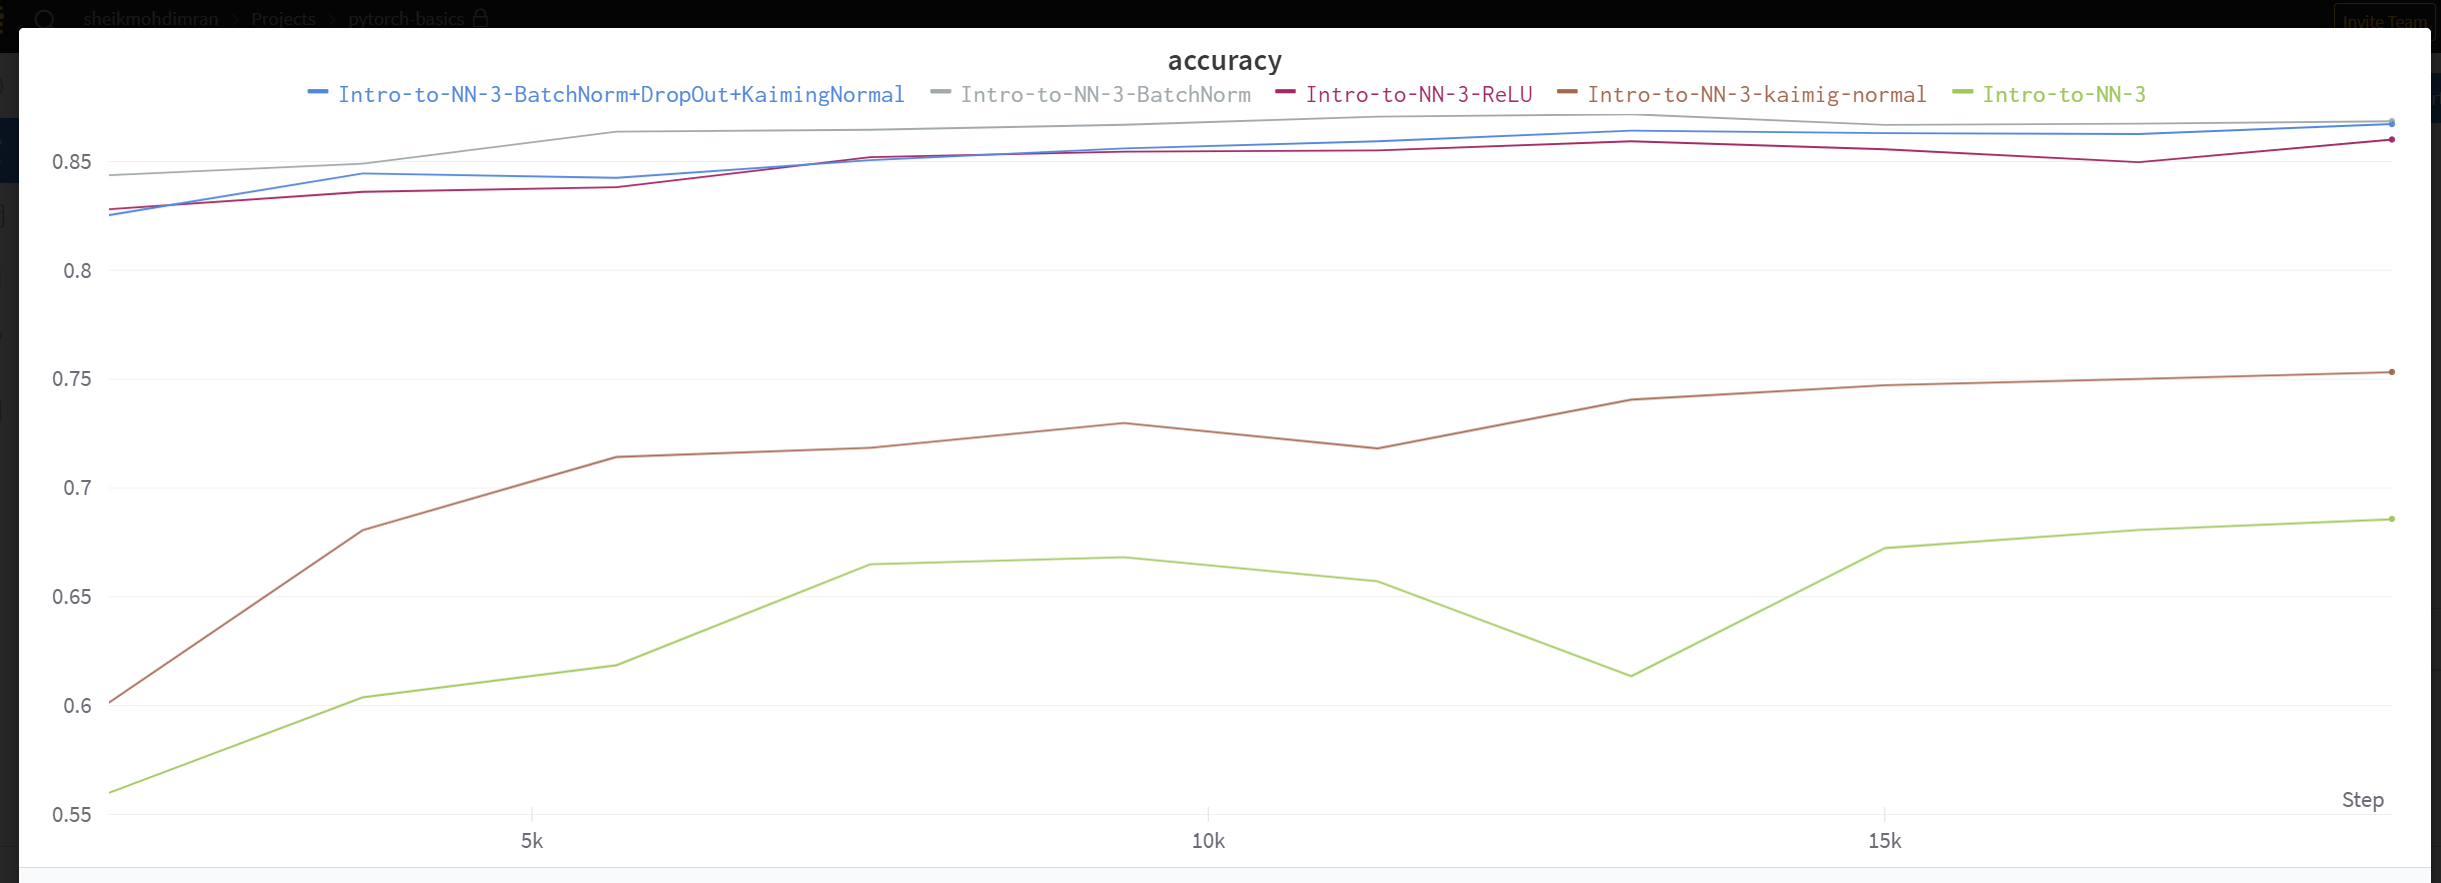